In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score


# Bibliotecas
### Numpy 
É utilizado para facilitar e deixar os cálculos de arranjos e matriciais mais simples de serem executados;
### Pandas
O Pandas é utilizado para facilitar a manipulação de datagramas, neste arquivo, o datagrama será o arquivo iris_2class.csv;
### Matplotlib
É utilizado para gerar visualização de dados à partir de diversos gráficos;
### Sklearn
A biblioteca Sklearn é utilizada para prover funções úteis ao aprendizado de máquina, nesta atividade, utilizaremos a sub-biblioteca train_test_split, cujo objetivo é dividir uma matriz de treino em partes aleatórias, tanto de treino, quanto de teste. Outra sub-biblioteca utilizada será a accuracy_score, cujo objetivo é prover maior facilidade em calcular a acurácia do algoritmo;

### Seaborn
Seaborn é também uma biblioteca para plotagem de gráficos em python, sendo muito útil para a visualização do comportamento dos mesmos.



O primeiro passo para o código é a definição do 
dataframe, para isso utilizamos a seguinte sentença, onde a sintaxe é baseada em:

df = pd.read_csv("nome_do_arquivo")

df é variavel, cujo tipo será um .csv para a manipulação futura

In [5]:
df = pd.read_csv("iris_2class.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


O primeiro objetivo da atividade é: Calcular as estatísticas descritivas de cada um dos atributos (características) agrupando por espécie.


Para isso, utilizaremos as seguintes sentenças:

In [6]:
df.groupby("especie").describe()["sepal length (cm)"]

,count,mean,std,min,25%,50%,75%,max
especie,,,,,,,,
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


Temos que a sintaxe nos diz: 

df_groupby -> agrupar o data frame por ("característica")

describe()["dado_a_ser_descrito"] -> Nos indica qual dado será feito estatísticamente, sendo as estatísticas os atributos: 

contagem, média, desvio padrão, menor número, quantas características são possuídas por 25 à 75% da população, até a maior.


In [7]:
df.groupby("especie").describe()["sepal width (cm)"]

,count,mean,std,min,25%,50%,75%,max
especie,,,,,,,,
versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [8]:
df.groupby("especie").describe()["petal length (cm)"]

,count,mean,std,min,25%,50%,75%,max
especie,,,,,,,,
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [9]:

df.groupby("especie").describe()["petal width (cm)"]

,count,mean,std,min,25%,50%,75%,max
especie,,,,,,,,
versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


A próxima tarefa da atividade, é realizar a plotagem de histogramas, a fim de comparar com os resultados da análise descritiva. Para a criação do gráfico, será utilizada a sentença:

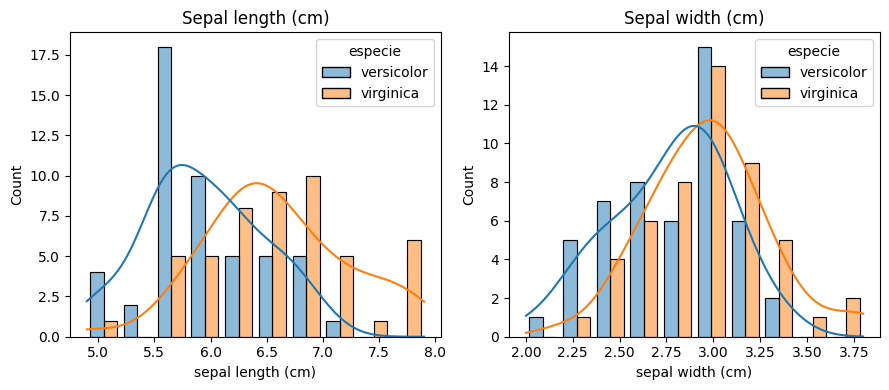

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0],kde=True).set(title = "Sepal length (cm)")
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[1],kde=True).set(title = "Sepal width (cm)")

fig.tight_layout()

plt.show()

A sintaxe da bilbioteca *matplolib* segue:

figura e axes = plt.subplot(n_de_linhas,n_colunas, tamanho da figura)

essa primeira parte evidencia que criaremos dois gráficos numa matriz 1 por 2, cujo tamanho será dado por 9,4

pense como:

    lin x x 
      col col  

Depois disso, nós teremos um código da biblioteca *seaborn*

o código:
sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0],kde=True).set(title = "Sepal length (cm)")

nos diz que sns.plotar_histograma(dados = dataframe.csv declarado, numero de barras, atributo das barras, qual será o fator que diferenciará as barras, o atributo multiple nos dá que será diferenciada por uma barra diferente caso ambas estejam no mesmo campo, o tamanho das barras, o axe do matplot lib, e a adição das linhas kde, para melhor visualização).

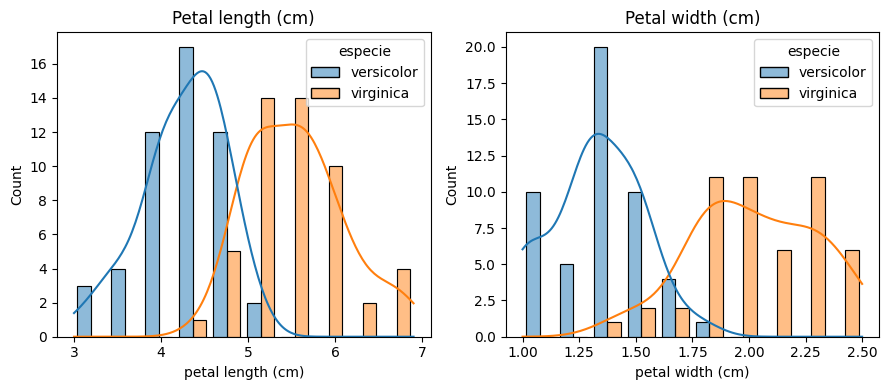

In [11]:
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
sns.histplot(data=df, bins=10, x='petal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0],kde=True).set(title = "Petal length (cm)")
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[1],kde=True).set(title = "Petal width (cm)")

fig2.tight_layout()

plt.show()

Após analisar os gráficos, é visto que a largura das pétalas parece ser uma boa escolha para treinar nosso algoritmo, visto que após 1.75 centímetros, existe apenas uma versicolor, o tamanho está entre 1.75 e 1.50

Para a próxima parte do nosso trabalho, faremos um scatter plot (Gráfico de dispersão), para também analisarmos melhor os dados e vermos se realmente é uma boa escolha. 

Para tal, utilizaremos a sintaxe:

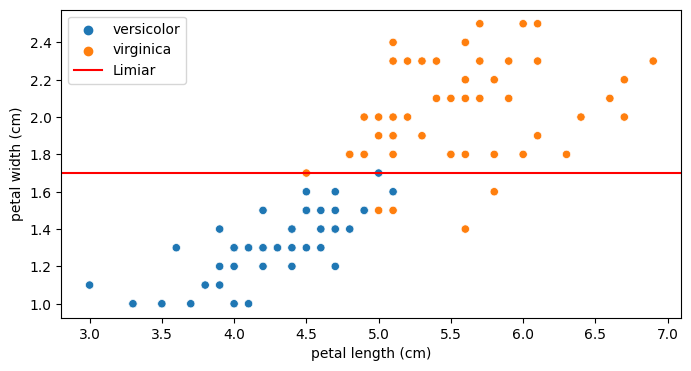

In [14]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.axhline(1.7, color='red', label='Limiar')
plt.legend()
plt.show()

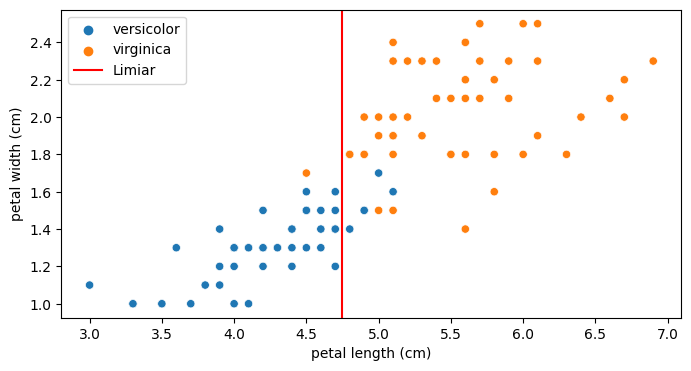

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.axvline(4.75, color='red', label='Limiar')
plt.legend()
plt.show()

Foram criados dois gráficos para análise dos dados, um com uma linha horizontal na largura das pétalas, e outro com uma linha vertical no tamanho das pétalas, o que mais teve exatidão foi o da linha horizontal na largura das pétalas, então usaremos este para o algoritmo de busca exaustiva

Para realizarmos a busca exaustiva, precisamos gerar um classificador por limiar antes, para isso utilizaremos a sintaxe:

In [57]:
def classificador_limiar(limiar, dados, rotulos=('versicolor', 'virginica')):
    resposta = []   
    for idx, dado in dados.iterrows():
        if dado[0] <= limiar:
            resposta.append(rotulos[0])
        else:
            resposta.append(rotulos[1])
    return pd.DataFrame(resposta, columns=['especie'])

Note que no código, nos definimos a função com as variáveis:

limiar, dados e rótulos, o fator limiar será um valor incialmente empírico que selecionarei com base nas análises anteriormente feitas, os dados serão os dados do banco de dados .csv, e os rótulos estão definidos por padrão, porém caso queira, eu posso mudar na hora de invocar a função.

A função cria uma lista resposta que vai iterando entre os dados providos, e caso o dado seja menor ou igual a limiar, coloca-se a espécie versicolor na primeira coluna, caso não, coloca-se a espécie virginica na segunda.

retorna-se então o dataframe com as classificações


In [62]:
predicoes = classificador_limiar(1.75, df[['petal width (cm)', 'petal length (cm)']])
for p in predicoes.values.flatten():
    print(p, end=", ")

versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, virginica, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, versicolor, virginica, virginica, virginica, versicolor, versicolor, virginica, 

Note que o valor 1.75 foi colocado empíricamente pelo programador na hora de invocar a função, isso não se trata de aprendizagem de máquina e sim apenas de uma pessoa que analisou os dados e então selecionou aquele limiar que mais lhe fez sentido.

In [63]:
predicoes = classificador_limiar(1.75, df[['petal width (cm)', 'petal length (cm)']])
for i in np.vstack([df['especie'].values, predicoes['especie'].values]).T:
    print(i)

['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'virginica']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versic

Vimos que foi gerada uma grande tabela de resultados, onde os da esquerda são as predições feitas pelo algoritmo e as da direita são as veradeiras.

Agora iremos comparar os resultados e verificar se a escolha do limiar foi aceitável. Para isso, criaremos uma função que pega os resultados das predicoes e os compara com o dataframe original, chamado de gabarito.

Tal função irá iterar entre os elementos e comparar. Caso o valor da predição seja o mesmo do gabarito, o acerto é incrementado, caso não, o erro é incrementado.

In [70]:
def comparar_resultados(predicoes, gabarito, rotulo):
    predicoes = predicoes.values
    gabarito = gabarito.values
    acertos = 0
    erros = 0
    for i, gab in enumerate(gabarito):
        if gab == rotulo:
            if gab == predicoes[i]:
                acertos+=1
            else:
                erros+=1
    return acertos, erros

In [71]:
resultados_virginica = comparar_resultados(predicoes['especie'], df['especie'], 'virginica')
resultados_versicolor = comparar_resultados(predicoes['especie'], df['especie'], 'versicolor')

print("(virginica) Acertos e Erros:", resultados_virginica)
print("(versicolor) Acertos e Erros:", resultados_versicolor)

(virginica) Acertos e Erros: (45, 5)
(versicolor) Acertos e Erros: (49, 1)


É possível verificar que o algoritmo teve uma taxa de acerto boa, mas estamos sem um embasamento matemático para provar matematicamente a acurácia. Para isso, outro algoritmo foi criado, é um algoritmo simples que nos retorna a porcetagem de acerto do algoritmo

In [72]:
def acuracia(acertos, total_instancias):
    return acertos / total_instancias

print("Acurácia (virginica): %.3f" % (acuracia(resultados_virginica[0], resultados_virginica[0] + resultados_virginica[1]) ))
print("Acurácia (versicolor): %.3f" % (acuracia(resultados_versicolor[0], resultados_versicolor[0] + resultados_versicolor[1]) ))
total_de_instancias = len(predicoes)
print("Acurácia (Total): %.3f" % (acuracia(resultados_virginica[0] + resultados_versicolor[0], total_de_instancias) ))

Acurácia (virginica): 0.900
Acurácia (versicolor): 0.980
Acurácia (Total): 0.940


O mesmo código de acurácia total pode ser feito através da biblioteca sklearn, utilizando o accuracy_score

In [75]:
from sklearn.metrics import accuracy_score
print("Acurácia (Total) %.3f" % (accuracy_score(df['especie'], predicoes['especie'])))

Acurácia (Total) 0.940


# Utilizando a busca exaustiva para escolher o limiar

Como visto anteriormente, o limiar não foi escolhido pela máquina e sim empíricamente pelo programador. Agora iremos testar o método mais simples de seleção de limiar que será a busca exaustiva. 

Este método consiste em testar exaustivamente limiares diferentes a fim de escolher aquele que possuiu a maior pontuação de acurácia. Dado pelo algoritmo abaixo:

In [88]:
n_limiares = 100
limiares = np.linspace(1.5, 2.3, n_limiares)
acuracias = []

melhor_limiar = limiares[0]
melhor_acuracia = 0

dados = df[['petal width (cm)', 'petal length (cm)']]

for limiar in limiares:
    predicoes = classificador_limiar(limiar, dados)
    
    acuracia = accuracy_score(df['especie'], predicoes['especie'])
    acuracias.append(acuracia)
    
    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_limiar = limiar

print("Melhor limiar: %.3f, Melhor Acurácia: %.3f" % (melhor_limiar, melhor_acuracia))

Melhor limiar: 1.605, Melhor Acurácia: 0.940


O funcionamento do algoritmo se dá pela escolha de 100 limiares, estes limiares serão o número de particionamento dos valores entre 1.6 e 2.2 divididos 
igualmente entre si, isto é uma função da biblioteca numpy.

Após isso, iteramos a função classificadora limiar várias vezes com os diversos números particionados entre 1.5 e 2.3, nos retornando então o limiar que obteve o melhor resultado. Segue abaixo o gráfico para evidenciar a pontuação entre os limiares

 O melhor limiar foi o de 1.605 com a pontuação de 0.94, porém note que de 1.605 até 1.77, o valor se manteve constante


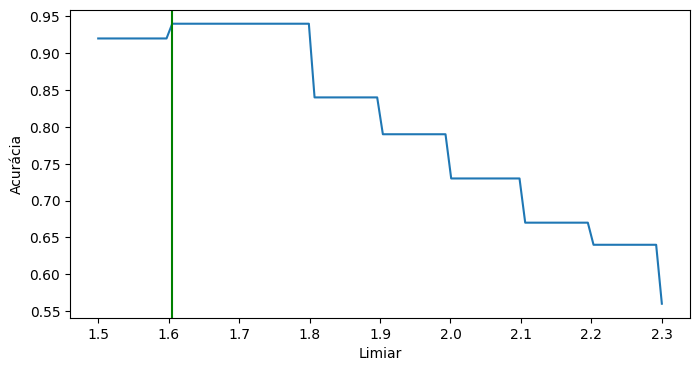

In [84]:
fig, axes = plt.subplots(figsize=(8,4))
axes.plot(limiares, acuracias)
axes.axvline(melhor_limiar, color='green')
axes.set_xlabel('Limiar')
axes.set_ylabel('Acurácia')
plt.show()

# Simulando um ambiente de teste real

Agora que testamos os dados, e fizemos uma busca exaustiva em todos, iremos utilizar um método de treino cujo objetivo é simular um ambiente real. Para isso, teremos de subdividir os testes entre o conjunto de treino e o conjunto de teste. Onde 80% dos dados serão de treino e 20% serão o de teste. Note que para a prova de uma aprendizagem, o cunjunto de teste **não deve ser visualizado pela máquina**.

Primeiro, devemos dividir os dados. Para tal, utilizaremos da biblioteca sklearn as ferramentas disponibilizadas por *train_test_split*


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['petal width (cm)', 'petal length (cm)']], df['especie'], 
                                                        test_size=0.2, stratify=df['especie'].tolist(),
                                                        shuffle=True, random_state=10)

No código acima, foram selecionadas as características a serem estudadas, e selecionado o valor de teste, através do *test_size*, valor este que varia de 0 à 1, onde são porcentagens de 0 a 100, através dos decimais. No caso acima, selecionamos um fator de 0.2, ou seja, 20% serão dados de teste e 80% serão dados de treino.

Agora iremos utilizar novamente a busca exaustiva no novo conjunto, para isso teremos de definir a função busca exaustiva, segue o algoritmo:

In [98]:
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)
print(y_treino.value_counts())
print(y_teste.value_counts())

(80, 2) (20, 2) (80,) (20,)
virginica     40
versicolor    40
Name: especie, dtype: int64
versicolor    10
virginica     10
Name: especie, dtype: int64


Primeiro modificaremos a função classificador limiar a fim de testar com mais exatidão: Apenas adicionamos um dado a mais (coluna) a fim de especificar a coluna que será testada.

In [108]:
def classificador_limiar(limiar, dados, coluna, rotulos=('versicolor', 'virginica')):
    resposta = []   
    for idx, dado in dados.iterrows():
        if dado[coluna] <= limiar:
            resposta.append(rotulos[0])
        else:
            resposta.append(rotulos[1])
    return pd.DataFrame(resposta, columns=['especie'])

In [109]:
def busca_exaustiva_clas_limiar(n_limiares,
                                x_treino,
                                y_treino,
                                coluna):
    limiares = np.linspace(x_treino[coluna].min(),
                           x_treino[coluna].max(),
                           n_limiares)
    
    melhor_limiar = limiares[0]
    melhor_acuracia = accuracy_score(y_treino,
                                     classificador_limiar(
                                           limiares[0],
                                           x_treino,
                                           coluna))
    for limiar in limiares[1:]:
        predicoes = classificador_limiar(limiar, x_treino, coluna)
        acuracia = accuracy_score(y_treino, predicoes)
        if acuracia > melhor_acuracia:
            melhor_acuracia = acuracia
            melhor_limiar = limiar

    return melhor_limiar, melhor_acuracia

Acima, vimos que colocamos como variáveis os números de limiares, colunas de treino e coluna de atributos, vamos invocar a função com os treinos!

In [123]:
melhor_limiar, melhor_acuracia = busca_exaustiva_clas_limiar(20, x_treino, y_treino, 'petal width (cm)')
print(melhor_limiar,melhor_acuracia)

1.631578947368421 0.9375


Vimos então que com 20 particionamentos, para o atributo 'petal width', o melhor foi o de 1.631, com acurácia de 0.9375. Agora como estamos simulando um ambiente real, precisamos testar isso com o conjunto de teste, para isso faremos:

In [160]:
n_particoes = 20
acuracias = []

for i in range(n_particoes):
    x_treino, x_teste, y_treino, y_teste = train_test_split(df[['petal width (cm)']], df['especie'], 
                                                        test_size=0.2, stratify=df['especie'].tolist(),
                                                        shuffle=True, random_state=i)
    melhor_limiar, melhor_acuracia = busca_exaustiva_clas_limiar(20, x_treino, y_treino, 'petal width (cm)')
    predicoes = classificador_limiar(melhor_limiar, x_teste, 'petal width (cm)')
    acuracias.append(accuracy_score(y_teste, predicoes))

print("Acurácia (máxima): %.3f" % max(acuracias))
print("Acurácia (mínima): %.3f" % min(acuracias))
print("Acurácia (média): %.3f" % np.mean(acuracias))
print("Desvio padrão: %.3f" % np.std(acuracias))


Acurácia (máxima): 1.000
Acurácia (mínima): 0.850
Acurácia (média): 0.947
Desvio padrão: 0.033


# Criando os gráficos que nos evidenciam os limiares de teste e de treino

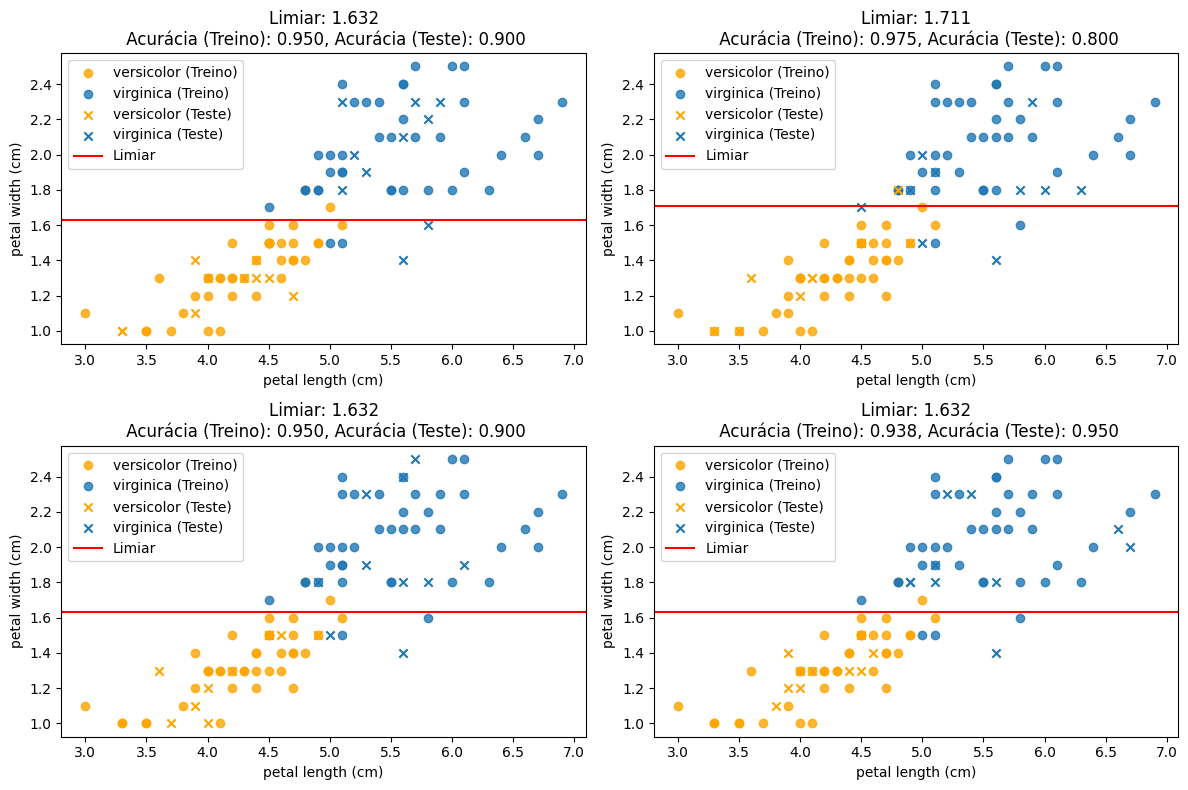

In [157]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
limiar = melhor_limiar
rns = [32, 42, 807, 51]   

accs = []

for row in range(2):
    for col in range(2):
        
        x_treino, x_teste, y_treino, y_teste = train_test_split(df[['petal width (cm)', 'petal length (cm)']], 
                                                        df['especie'], 
                                                        test_size=0.2, stratify=df['especie'].tolist(),
                                                        shuffle=True, random_state=rns[row * 2 + col])
        
        melhor_limiar, melhor_acuracia = busca_exaustiva_clas_limiar(20, x_treino, y_treino, 
                                                                              'petal width (cm)')
        
        axes[row][col].scatter(x = x_treino[y_treino=="versicolor"].values[:,1], 
                           y = x_treino[y_treino=="versicolor"].values[:,0],
                           label='versicolor (Treino)', c='orange', alpha=0.8)

        axes[row][col].scatter(x = x_treino[y_treino=="virginica"].values[:,1], 
                           y = x_treino[y_treino=="virginica"].values[:,0],
                           label='virginica (Treino)', c='#1f77b4', alpha=0.8)

        axes[row][col].scatter(x = x_teste[y_teste=='versicolor'].values[:,1], 
                           y = x_teste[y_teste=='versicolor'].values[:,0],
                           label='versicolor (Teste)', marker='x', c='orange')

        axes[row][col].scatter(x = x_teste[y_teste=='virginica'].values[:,1], 
                           y = x_teste[y_teste=='virginica'].values[:,0],
                           label='virginica (Teste)', marker='x', c='#1f77b4')

        axes[row][col].axhline(melhor_limiar, color='red', label='Limiar')
        
        axes[row][col].legend()
        axes[row][col].set_ylabel('petal width (cm)')
        axes[row][col].set_xlabel('petal length (cm)')
        
        predicoes = classificador_limiar(melhor_limiar, x_teste, 'petal width (cm)')
        acc = accuracy_score(y_teste, predicoes)
        accs.append(acc)
        
        predicoes_treino = classificador_limiar(melhor_limiar, x_treino, "petal width (cm)")
        acc_treino = accuracy_score(y_treino, predicoes_treino)
        
        axes[row][col].set_title('Limiar: %.3f\n Acurácia (Treino): %.3f, Acurácia (Teste): %.3f' 
                                 % (melhor_limiar, acc_treino, acc))
        
fig.tight_layout()

#Conclusão

Após executar diversas vezes, depreende-se que a busca exaustiva possui um grau de acerto bom, porém ela depende muito da máquina para ser executada. Nota-se que o limiar 1.606, utilizando a largura das pétalas foi o melhor que pode-se ter sido abstraído, com uma acurácia de 95%!